# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [32]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [33]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    # YOUR CODE HERE
    function=(x**2)*(numpy.sin(x))
    return function;

Ensure your function works with numpy arrays:

In [34]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [35]:
def g(x):
    '''Analytical integral of f(x).'''
    # YOUR CODE HERE
    integral=((2*x)*(numpy.sin(x)))-((x**2-2)*numpy.cos(x))-2
    return integral;


Check your solution with the same numpy array:

In [36]:
assert g(0) == 0.

In [37]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [38]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    # YOUR CODE HERE
    def_integral=g(xmax)-g(xmin)
    return def_integral;

Check your analytic function:

In [39]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [40]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    # YOUR CODE HERE
    
    dx= (xmax-xmin)/N
    m=dx/2
    a = 0
    b = 0
    
    for i in range (0,N):
        a = a + 4*f(xmin+(2*i + 1)*m)
    for i in range (0, N-1):
        b = b + 2*f(xmin + (i + 1)*2*m)
        
    return (dx/6)*(f(xmin)+ a + b + f(xmax))


Make sure you have implemented Simpson's rule correctly:

In [41]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [42]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


Text(0.5,0,'Number of Panels')

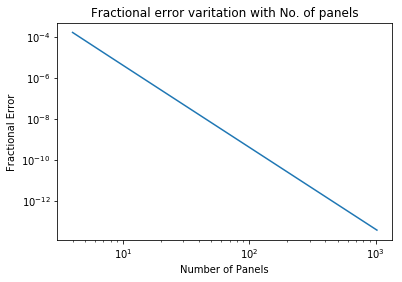

In [43]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024,] # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
def numeric(x0, x1, t):
    result= []
    for i in t:
        result.append(integrate_numeric(x0, x1, i))
    return result;
fractional_error= 1 - ((numeric(x0, x1, panel_counts))/(result_analytic))
plt.xscale('log')
plt.yscale('log')
plt.plot(panel_counts, fractional_error)
plt.title('Fractional Error varitation with No. of panels')
plt.ylabel('Fractional Error')
plt.xlabel('Number of Panels')

    


What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

As can be seen from the plot above the fractional error decreases as the number of panels is increased, hence the numerical intergration method is increasing in accuracy as N increases. If the number of panels is too large however, we will start to see the numerical intergration method differ from expected results due to rounding issues and the method loses its accuracy. If the function being integrated or its derivatives are not smooth then this occurs for a lower value of N.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

Trapezium rule is less accurate and if plotted above would start higher (less accurate) and have less steep a gradient than the Simpson's rule showing that although increasing the number of panels does increase accuracy, it increases at a slower rate than with the Simpson rule. Furthermore, the trapezium rule is still affected by the rounding issues if N is taken to be too large.